# Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:\\Users\\hp\\Desktop\\wave1_agg.csv")
df.loc[df.gone == True, 'Churn'] = 1
df.loc[df.gone == False, 'Churn'] = 0
df.drop(["user_id","username","gone",'Unnamed: 0','data_min','data_max','time'], inplace = True, axis = 1)
import numpy as np
# df.time = (df.time / np.timedelta64(1,'D')).astype(int)
# df.aborcja = df.aborcja.astype(int)
# df.piekłokobiet = df.piekłokobiet.astype(int)
# df.wypierdalać = df.wypierdalać.astype(int)
# # df.wyroknakobiety = df.wyroknakobiety.astype(int)
# df.falasprzeciwu = df.falasprzeciwu.astype(int)
# df.strajkobiet = df.strajkobiet.astype(int)
# df.zakazaborcji = df.zakazaborcji.astype(int)
# df.protestkobiet = df.protestkobiet.astype(int)
# df.jebacpis = df.jebacpis.astype(int)
# df.jebaćpis = df.jebaćpis.astype(int)
# df.osiemgwiazd = df.osiemgwiazd.astype(int)
# df.osiemgwiazdek = df.osiemgwiazdek.astype(int)
# df.wypierdalac = df.wypierdalac.astype(int)
# df.strajkkobiet = df.strajkkobiet.astype(int)
# df.tojestwojna = df.tojestwojna.astype(int)
# df.czarnyprotest = df.czarnyprotest.astype(int)
# df.pieklokobiet = df.pieklokobiet.astype(int)
# df.prawakobiet = df.prawakobiet.astype(int)
# df.aborcjabezgranic = df.aborcjabezgranic.astype(int)
# pd.set_option('display.max_columns', None)
df.head()

,id,urls,photos,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,wulga,wulga_proc,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSwypierdalać,HASHTAGSkobieta,HASHTAGSaborcja,HASHTAGSstrajk,HASHTAGSpiekłokobiet,HASHTAGStojestwojna,HASHTAGSchcieć,HASHTAGSpis,HASHTAGSlewica,HASHTAGSmieć,HASHTAGSprawy,HASHTAGSprotest,HASHTAGSdziecko,HASHTAGSludzie,HASHTAGSwyroknakobiety,HASHTAGSstrajkobiet,HASHTAGSżyć,HASHTAGSmartalempart,HASHTAGSwiedzieć,HASHTAGSfalasprzeciwu,HASHTAGSzakazaborcji,HASHTAGSprotestkobiet,HASHTAGSjebacpis,HASHTAGSjebaćpis,HASHTAGSosiemgwiazd,HASHTAGSosiemgwiazdek,HASHTAGSwypierdalac,HASHTAGSczarnyprotest,HASHTAGSpieklokobiet,HASHTAGSprawakobiet,HASHTAGSaborcjabezgranic,HASHTAGSkobiet,HASHTAGSpiekłokobietpis,HASHTAGSstrajku,HASHTAGSkobiety,HASHTAGSaborcji,HASHTAGSpisorgpl,HASHTAGSdzieci,HASHTAGSpoland,HASHTAGStvpinfo,HASHTAGSprawa,HASHTAGSwiosnabiedronia,HASHTAGSludzi,HASHTAGSprawo,HASHTAGSpolsce,HASHTAGSaborcją,HASHTAGSjoankasw,TWEETstrajkkobiet,TWEETwypierdalać,TWEETkobieta,TWEETaborcja,TWEETstrajk,TWEETpiekłokobiet,TWEETtojestwojna,TWEETchcieć,TWEETpis,TWEETlewica,TWEETmieć,TWEETprawy,TWEETprotest,TWEETdziecko,TWEETludzie,TWEETwyroknakobiety,TWEETstrajkobiet,TWEETżyć,TWEETmartalempart,TWEETwiedzieć,TWEETfalasprzeciwu,TWEETzakazaborcji,TWEETprotestkobiet,TWEETjebacpis,TWEETjebaćpis,TWEETosiemgwiazd,TWEETosiemgwiazdek,TWEETwypierdalac,TWEETczarnyprotest,TWEETpieklokobiet,TWEETprawakobiet,TWEETaborcjabezgranic,TWEETkobiet,TWEETpiekłokobietpis,TWEETstrajku,TWEETkobiety,TWEETaborcji,TWEETpisorgpl,TWEETdzieci,TWEETpoland,TWEETtvpinfo,TWEETprawa,TWEETwiosnabiedronia,TWEETludzi,TWEETprawo,TWEETpolsce,TWEETaborcją,TWEETjoankasw,STEMstrajkkobiet,STEMwypierdalać,STEMkobieta,STEMaborcja,STEMstrajk,STEMpiekłokobiet,STEMtojestwojna,STEMchcieć,STEMpis,STEMlewica,STEMmieć,STEMprawy,STEMprotest,STEMdziecko,STEMludzie,STEMwyroknakobiety,STEMstrajkobiet,STEMżyć,STEMmartalempart,STEMwiedzieć,STEMfalasprzeciwu,STEMzakazaborcji,STEMprotestkobiet,STEMjebacpis,STEMjebaćpis,STEMosiemgwiazd,STEMosiemgwiazdek,STEMwypierdalac,STEMczarnyprotest,STEMpieklokobiet,STEMprawakobiet,STEMaborcjabezgranic,STEMkobiet,STEMpiekłokobietpis,STEMstrajku,STEMkobiety,STEMaborcji,STEMpisorgpl,STEMdzieci,STEMpoland,STEMtvpinfo,STEMprawa,STEMwiosnabiedronia,STEMludzi,STEMprawo,STEMpolsce,STEMaborcją,STEMjoankasw,Churn
0,13,6,4,13,8,4.0,11.0,75.0,19.0,2150,248,3.0,1,0.0,0.284615,3.7,3,5,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,0,0,11,3,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,11,6,3,0,11,3,0,0,9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,29,0,17,29,8,6.0,6.0,33.0,17.0,2401,242,4.0,0,0.0,0.051724,1.5,4,22,0,0,8,4,2,0,0,0,0,0,2,0,0,4,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,14,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,6,22,0,0,10,4,2,0,3,0,0,0,2,0,1,4,4,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,16,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0,6,22,1,2,10,4,2,0,3,0,0,1,2,0,1,4,4,4,1,0,0,0,2,0,0,0,0,0,0,0,0,0,16,0,0,4,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,1,1,0,1,0,0.0,0.0,0.0,10.0,130,17,1.0,0,0.0,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,1,1,0,1,0,0.0,0.0,0.0,10.0,131,16,7.0,0,0.0,-1.000000,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,11,0,0,11,11,9.0,0.0,10.0,12.0,1490,210,6.0,1,0.0,-0.136364,-1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,11,0,0,0,0,0,0

In [3]:
df.head()

,id,urls,photos,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,wulga,wulga_proc,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSwypierdalać,HASHTAGSkobieta,HASHTAGSaborcja,HASHTAGSstrajk,HASHTAGSpiekłokobiet,HASHTAGStojestwojna,HASHTAGSchcieć,HASHTAGSpis,HASHTAGSlewica,HASHTAGSmieć,HASHTAGSprawy,HASHTAGSprotest,HASHTAGSdziecko,HASHTAGSludzie,HASHTAGSwyroknakobiety,HASHTAGSstrajkobiet,HASHTAGSżyć,HASHTAGSmartalempart,HASHTAGSwiedzieć,HASHTAGSfalasprzeciwu,HASHTAGSzakazaborcji,HASHTAGSprotestkobiet,HASHTAGSjebacpis,HASHTAGSjebaćpis,HASHTAGSosiemgwiazd,HASHTAGSosiemgwiazdek,HASHTAGSwypierdalac,HASHTAGSczarnyprotest,HASHTAGSpieklokobiet,HASHTAGSprawakobiet,HASHTAGSaborcjabezgranic,HASHTAGSkobiet,HASHTAGSpiekłokobietpis,HASHTAGSstrajku,HASHTAGSkobiety,HASHTAGSaborcji,HASHTAGSpisorgpl,HASHTAGSdzieci,HASHTAGSpoland,HASHTAGStvpinfo,HASHTAGSprawa,HASHTAGSwiosnabiedronia,HASHTAGSludzi,HASHTAGSprawo,HASHTAGSpolsce,HASHTAGSaborcją,HASHTAGSjoankasw,TWEETstrajkkobiet,TWEETwypierdalać,TWEETkobieta,TWEETaborcja,TWEETstrajk,TWEETpiekłokobiet,TWEETtojestwojna,TWEETchcieć,TWEETpis,TWEETlewica,TWEETmieć,TWEETprawy,TWEETprotest,TWEETdziecko,TWEETludzie,TWEETwyroknakobiety,TWEETstrajkobiet,TWEETżyć,TWEETmartalempart,TWEETwiedzieć,TWEETfalasprzeciwu,TWEETzakazaborcji,TWEETprotestkobiet,TWEETjebacpis,TWEETjebaćpis,TWEETosiemgwiazd,TWEETosiemgwiazdek,TWEETwypierdalac,TWEETczarnyprotest,TWEETpieklokobiet,TWEETprawakobiet,TWEETaborcjabezgranic,TWEETkobiet,TWEETpiekłokobietpis,TWEETstrajku,TWEETkobiety,TWEETaborcji,TWEETpisorgpl,TWEETdzieci,TWEETpoland,TWEETtvpinfo,TWEETprawa,TWEETwiosnabiedronia,TWEETludzi,TWEETprawo,TWEETpolsce,TWEETaborcją,TWEETjoankasw,STEMstrajkkobiet,STEMwypierdalać,STEMkobieta,STEMaborcja,STEMstrajk,STEMpiekłokobiet,STEMtojestwojna,STEMchcieć,STEMpis,STEMlewica,STEMmieć,STEMprawy,STEMprotest,STEMdziecko,STEMludzie,STEMwyroknakobiety,STEMstrajkobiet,STEMżyć,STEMmartalempart,STEMwiedzieć,STEMfalasprzeciwu,STEMzakazaborcji,STEMprotestkobiet,STEMjebacpis,STEMjebaćpis,STEMosiemgwiazd,STEMosiemgwiazdek,STEMwypierdalac,STEMczarnyprotest,STEMpieklokobiet,STEMprawakobiet,STEMaborcjabezgranic,STEMkobiet,STEMpiekłokobietpis,STEMstrajku,STEMkobiety,STEMaborcji,STEMpisorgpl,STEMdzieci,STEMpoland,STEMtvpinfo,STEMprawa,STEMwiosnabiedronia,STEMludzi,STEMprawo,STEMpolsce,STEMaborcją,STEMjoankasw,Churn
0,13,6,4,13,8,4.0,11.0,75.0,19.0,2150,248,3.0,1,0.0,0.284615,3.7,3,5,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,0,0,11,3,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,11,6,3,0,11,3,0,0,9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,29,0,17,29,8,6.0,6.0,33.0,17.0,2401,242,4.0,0,0.0,0.051724,1.5,4,22,0,0,8,4,2,0,0,0,0,0,2,0,0,4,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,14,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,6,22,0,0,10,4,2,0,3,0,0,0,2,0,1,4,4,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,16,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0,6,22,1,2,10,4,2,0,3,0,0,1,2,0,1,4,4,4,1,0,0,0,2,0,0,0,0,0,0,0,0,0,16,0,0,4,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,1,1,0,1,0,0.0,0.0,0.0,10.0,130,17,1.0,0,0.0,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,1,1,0,1,0,0.0,0.0,0.0,10.0,131,16,7.0,0,0.0,-1.000000,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,11,0,0,11,11,9.0,0.0,10.0,12.0,1490,210,6.0,1,0.0,-0.136364,-1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,11,0,0,0,0,0,0

In [4]:
# def datapreparation(filepath):
    
#     df = pd.read_csv(filepath)
#     df.drop(["customerID"], inplace = True, axis = 1)
    
#     df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
#     df.TotalCharges.fillna(0, inplace = True)
#     df.TotalCharges = df.TotalCharges.astype(float)
    
#     cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
#     for col in cols1:
#         df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
#     df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
#     df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
#     cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#     for col in cols2:
#         df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
#     df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
#     return df

In [5]:
# df = datapreparation(filepath = "C:/Data/Telco-Customer-Churn.csv")
df.Churn.value_counts()


1.0    34434
0.0    22502
Name: Churn, dtype: int64

In [6]:
df.isnull().any().any()

False

In [7]:
 pd.set_option('display.max_columns', None)

In [8]:
# for i in X:
#     print(df[df[i].isna()])

In [11]:

import sklearn
import sklearn.neighbors


In [12]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

corrMatrix = df.corr()
corrMatrix

,id,urls,photos,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,wulga,wulga_proc,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSwypierdalać,HASHTAGSkobieta,HASHTAGSaborcja,HASHTAGSstrajk,HASHTAGSpiekłokobiet,HASHTAGStojestwojna,HASHTAGSchcieć,HASHTAGSpis,HASHTAGSlewica,HASHTAGSmieć,HASHTAGSprawy,HASHTAGSprotest,HASHTAGSdziecko,HASHTAGSludzie,HASHTAGSwyroknakobiety,HASHTAGSstrajkobiet,HASHTAGSżyć,HASHTAGSmartalempart,HASHTAGSwiedzieć,HASHTAGSfalasprzeciwu,HASHTAGSzakazaborcji,HASHTAGSprotestkobiet,HASHTAGSjebacpis,HASHTAGSjebaćpis,HASHTAGSosiemgwiazd,HASHTAGSosiemgwiazdek,HASHTAGSwypierdalac,HASHTAGSczarnyprotest,HASHTAGSpieklokobiet,HASHTAGSprawakobiet,HASHTAGSaborcjabezgranic,HASHTAGSkobiet,HASHTAGSpiekłokobietpis,HASHTAGSstrajku,HASHTAGSkobiety,HASHTAGSaborcji,HASHTAGSpisorgpl,HASHTAGSdzieci,HASHTAGSpoland,HASHTAGStvpinfo,HASHTAGSprawa,HASHTAGSwiosnabiedronia,HASHTAGSludzi,HASHTAGSprawo,HASHTAGSpolsce,HASHTAGSaborcją,HASHTAGSjoankasw,TWEETstrajkkobiet,TWEETwypierdalać,TWEETkobieta,TWEETaborcja,TWEETstrajk,TWEETpiekłokobiet,TWEETtojestwojna,TWEETchcieć,TWEETpis,TWEETlewica,TWEETmieć,TWEETprawy,TWEETprotest,TWEETdziecko,TWEETludzie,TWEETwyroknakobiety,TWEETstrajkobiet,TWEETżyć,TWEETmartalempart,TWEETwiedzieć,TWEETfalasprzeciwu,TWEETzakazaborcji,TWEETprotestkobiet,TWEETjebacpis,TWEETjebaćpis,TWEETosiemgwiazd,TWEETosiemgwiazdek,TWEETwypierdalac,TWEETczarnyprotest,TWEETpieklokobiet,TWEETprawakobiet,TWEETaborcjabezgranic,TWEETkobiet,TWEETpiekłokobietpis,TWEETstrajku,TWEETkobiety,TWEETaborcji,TWEETpisorgpl,TWEETdzieci,TWEETpoland,TWEETtvpinfo,TWEETprawa,TWEETwiosnabiedronia,TWEETludzi,TWEETprawo,TWEETpolsce,TWEETaborcją,TWEETjoankasw,STEMstrajkkobiet,STEMwypierdalać,STEMkobieta,STEMaborcja,STEMstrajk,STEMpiekłokobiet,STEMtojestwojna,STEMchcieć,STEMpis,STEMlewica,STEMmieć,STEMprawy,STEMprotest,STEMdziecko,STEMludzie,STEMwyroknakobiety,STEMstrajkobiet,STEMżyć,STEMmartalempart,STEMwiedzieć,STEMfalasprzeciwu,STEMzakazaborcji,STEMprotestkobiet,STEMjebacpis,STEMjebaćpis,STEMosiemgwiazd,STEMosiemgwiazdek,STEMwypierdalac,STEMczarnyprotest,STEMpieklokobiet,STEMprawakobiet,STEMaborcjabezgranic,STEMkobiet,STEMpiekłokobietpis,STEMstrajku,STEMkobiety,STEMaborcji,STEMpisorgpl,STEMdzieci,STEMpoland,STEMtvpinfo,STEMprawa,STEMwiosnabiedronia,STEMludzi,STEMprawo,STEMpolsce,STEMaborcją,STEMjoankasw,Churn
id,1.000000,0.473013,0.721212,1.000000,0.680442,0.279839,0.190194,0.242731,0.027844,0.936852,0.930213,0.003522,0.416144,-0.042474,0.008479,-0.140383,0.833438,0.639907,0.301400,0.294848,0.843379,0.657544,0.567186,NaN,0.486448,0.124828,0.031063,0.158441,0.428055,0.012903,0.203904,0.521644,0.473533,NaN,0.035908,0.054138,0.202521,0.210652,0.338900,0.247750,0.315867,0.040148,0.029076,0.180573,0.293361,0.202590,0.264269,0.190736,0.887054,NaN,0.089983,0.561388,0.224627,0.020330,0.125496,0.183198,0.138760,0.275919,0.001740,0.172727,0.100612,0.088056,0.004059,NaN,0.901802,0.650452,0.372665,0.387112,0.915660,0.657491,0.567238,0.105656,0.734451,0.267830,0.354050,0.217933,0.588733,0.253628,0.414376,0.521658,0.474253,0.322714,0.293546,0.278544,0.202521,0.210638,0.338902,0.247360,0.316027,0.038516,0.021150,0.178192,0.293554,0.202577,0.264221,0.190736,0.958156,NaN,0.240351,0.626223,0.357025,0.431105,0.459023,0.209995,0.170967,0.481652,0.159276,0.551416,0.333149,0.378968,0.156128,0.188350,0.901831,0.685993,0.630881,0.446750,0.915621,0.657498,0.567230,0.553210,0.734132,0.284054,0.697221,0.516010,0.591962,0.427003,0.556901,0.521657,0.474253,0.599052,0.293546,0.614692,0.202521,0.210638,0.338900,0.247380,0.316027,0.038516,0.021150,0.177971,0.293554,0.202588,0.264221,0.190795,0.958205,NaN,0.124946,0.558965,0.226291,0.431114,0.195968,0.210000,0.362858,0.440872,0.159276,0.557252,0.233743,0.378968,0.004944,0.188350,-0.228604
urls,0.473013,1.000000,0.329914,0.473013,0.249839,0.249137,0.128724,0.157596,0.005689,0.481076,0.460372,-0.001107,0.088162,-0.026056,-0.008585,-0.185579,0.426283,0.279018,0.100706,0.262267,0.42

In [13]:
pd.set_option('display.max_rows', 161)
df[['Churn','video','reply_to','replies_count','retweets_count','likes_count','time_of_tweet','length','num_of_words','weekDay','sentiment_avg','sentiment_sum','HASHTAGSstrajkkobiet','HASHTAGSstrajk','HASHTAGSkobiet','TWEETstrajkkobiet','TWEETaborcja','TWEETstrajk','TWEETpis','TWEETkobiet','STEMstrajkkobiet','STEMkobieta','STEMaborcja','STEMstrajk','STEMlewica','STEMkobiet']].corr()

,Churn,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSstrajk,HASHTAGSkobiet,TWEETstrajkkobiet,TWEETaborcja,TWEETstrajk,TWEETpis,TWEETkobiet,STEMstrajkkobiet,STEMkobieta,STEMaborcja,STEMstrajk,STEMlewica,STEMkobiet
Churn,1.000000,-0.228604,-0.242745,-0.055625,-0.030553,-0.036681,0.000522,-0.215520,-0.225145,-0.033937,0.027287,0.066313,-0.108681,-0.111263,-0.117443,-0.186769,-0.149237,-0.195710,-0.133289,-0.194343,-0.186826,-0.143744,-0.172560,-0.195716,-0.153177,-0.194424
video,-0.228604,1.000000,0.680442,0.279839,0.190194,0.242731,0.027844,0.936852,0.930213,0.003522,0.008479,-0.140383,0.833438,0.843379,0.887054,0.901802,0.387112,0.915660,0.734451,0.958156,0.901831,0.630881,0.446750,0.915621,0.284054,0.958205
reply_to,-0.242745,0.680442,1.000000,0.056676,0.022364,0.035511,-0.004736,0.683019,0.690900,0.033538,-0.000260,-0.107918,0.393221,0.401874,0.418533,0.601369,0.269531,0.604676,0.606708,0.605420,0.601416,0.511525,0.334109,0.604682,0.358884,0.605533
replies_count,-0.055625,0.279839,0.056676,1.000000,0.524587,0.696232,0.008353,0.253371,0.255771,-0.000198,0.001326,-0.032875,0.192870,0.192356,0.212944,0.195500,0.134329,0.205277,0.149186,0.227496,0.195508,0.211503,0.176101,0.205083,0.061850,0.227505
retweets_count,-0.030553,0.190194,0.022364,0.524587,1.000000,0.922809,0.009996,0.168001,0.166665,-0.001420,0.002679,-0.021751,0.154782,0.152495,0.163400,0.145547,0.067848,0.148277,0.129868,0.162080,0.145553,0.137604,0.092021,0.148151,0.019872,0.162084
likes_count,-0.036681,0.242731,0.035511,0.696232,0.922809,1.000000,0.009892,0.207794,0.208904,-0.001324,0.003513,-0.019943,0.170791,0.169343,0.186221,0.164709,0.081449,0.170046,0.148380,0.190123,0.164715,0.175516,0.115512,0.169833,0.027994,0.190128
time_of_tweet,0.000522,0.027844,-0.004736,0.008353,0.009996,0.009892,1.000000,0.016220,0.014713,-0.061919,0.007791,0.004390,0.035419,0.036768,0.039322,0.023558,-0.000803,0.024846,0.012339,0.028715,0.023515,0.007586,-0.003736,0.024847,-0.017331,0.028701
length,-0.215520,0.936852,0.683019,0.253371,0.168001,0.207794,0.016220,1.000000,0.991791,0.006993,0.003778,-0.140513,0.815632,0.824605,0.859024,0.877547,0.442591,0.890798,0.736496,0.925401,0.877505,0.639219,0.507290,0.890738,0.329172,0.925427
num_of_words,-0.225145,0.930213,0.690900,0.255771,0.166665,0.208904,0.014713,0.991791,1.000000,0.007685,0.002773,-0.138865,0.789049,0.796746,0.832036,0.862325,0.453239,0.875178,0.716845,0.909881,0.862283,0.635934,0.521406,0.875118,0.330726,0.909922
weekDay,-0.033937,0.003522,0.033538,-0.000198,-0.001420,-0.001324,-0.061919,0.006993,0.007685,1.000000,0.000988,-0.002687,-0.023513,-0.027034,-0.015020,0.002598,0.018862,-0.002589,-0.006636,0.004774,0.002644,0.001134,0.021845,-0.002568,0.041064,0.004785


In [15]:

df[['Churn','video','reply_to','replies_count','retweets_count','likes_count','time_of_tweet','length','num_of_words','weekDay','sentiment_avg','sentiment_sum','HASHTAGSstrajkkobiet','HASHTAGSstrajk','HASHTAGSkobiet','TWEETstrajkkobiet','TWEETaborcja','TWEETstrajk','TWEETpis','TWEETkobiet','STEMstrajkkobiet','STEMkobieta','STEMaborcja','STEMstrajk','STEMlewica','STEMkobiet']].corr().style.background_gradient(cmap='coolwarm')

,Churn,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSstrajk,HASHTAGSkobiet,TWEETstrajkkobiet,TWEETaborcja,TWEETstrajk,TWEETpis,TWEETkobiet,STEMstrajkkobiet,STEMkobieta,STEMaborcja,STEMstrajk,STEMlewica,STEMkobiet
Churn,1.000000,-0.228604,-0.242745,-0.055625,-0.030553,-0.036681,0.000522,-0.215520,-0.225145,-0.033937,0.027287,0.066313,-0.108681,-0.111263,-0.117443,-0.186769,-0.149237,-0.195710,-0.133289,-0.194343,-0.186826,-0.143744,-0.172560,-0.195716,-0.153177,-0.194424
video,-0.228604,1.000000,0.680442,0.279839,0.190194,0.242731,0.027844,0.936852,0.930213,0.003522,0.008479,-0.140383,0.833438,0.843379,0.887054,0.901802,0.387112,0.915660,0.734451,0.958156,0.901831,0.630881,0.446750,0.915621,0.284054,0.958205
reply_to,-0.242745,0.680442,1.000000,0.056676,0.022364,0.035511,-0.004736,0.683019,0.690900,0.033538,-0.000260,-0.107918,0.393221,0.401874,0.418533,0.601369,0.269531,0.604676,0.606708,0.605420,0.601416,0.511525,0.334109,0.604682,0.358884,0.605533
replies_count,-0.055625,0.279839,0.056676,1.000000,0.524587,0.696232,0.008353,0.253371,0.255771,-0.000198,0.001326,-0.032875,0.192870,0.192356,0.212944,0.195500,0.134329,0.205277,0.149186,0.227496,0.195508,0.211503,0.176101,0.205083,0.061850,0.227505
retweets_count,-0.030553,0.190194,0.022364,0.524587,1.000000,0.922809,0.009996,0.168001,0.166665,-0.001420,0.002679,-0.021751,0.154782,0.152495,0.163400,0.145547,0.067848,0.148277,0.129868,0.162080,0.145553,0.137604,0.092021,0.148151,0.019872,0.162084
likes_count,-0.036681,0.242731,0.035511,0.696232,0.922809,1.000000,0.009892,0.207794,0.208904,-0.001324,0.003513,-0.019943,0.170791,0.169343,0.186221,0.164709,0.081449,0.170046,0.148380,0.190123,0.164715,0.175516,0.115512,0.169833,0.027994,0.190128
time_of_tweet,0.000522,0.027844,-0.004736,0.008353,0.009996,0.009892,1.000000,0.016220,0.014713,-0.061919,0.007791,0.004390,0.035419,0.036768,0.039322,0.023558,-0.000803,0.024846,0.012339,0.028715,0.023515,0.007586,-0.003736,0.024847,-0.017331,0.028701
length,-0.215520,0.936852,0.683019,0.253371,0.168001,0.207794,0.016220,1.000000,0.991791,0.006993,0.003778,-0.140513,0.815632,0.824605,0.859024,0.877547,0.442591,0.890798,0.736496,0.925401,0.877505,0.639219,0.507290,0.890738,0.329172,0.925427
num_of_words,-0.225145,0.930213,0.690900,0.255771,0.166665,0.208904,0.014713,0.991791,1.000000,0.007685,0.002773,-0.138865,0.789049,0.796746,0.832036,0.862325,0.453239,0.875178,0.716845,0.909881,0.862283,0.635934,0.521406,0.875118,0.330726,0.909922
weekDay,-0.033937,0.003522,0.033538,-0.000198,-0.001420,-0.001324,-0.061919,0.006993,0.007685,1.000000,0.000988,-0.002687,-0.023513,-0.027034,-0.015020,0.002598,0.018862,-0.002589,-0.006636,0.004774,0.002644,0.001134,0.021845,-0.002568,0.041064,0.004785


In [18]:
pd.set_option('display.max_columns', None)
corrMatrix['Churn']

id             -0.228604
urls           -0.098628
photos         -0.123097
video          -0.228604
reply_to       -0.242745
                  ...   
STEMprawo      -0.064153
STEMpolsce     -0.098206
STEMaborcją    -0.010882
STEMjoankasw   -0.124025
Churn           1.000000
Name: Churn, Length: 161, dtype: float64

In [19]:
from sklearn.neighbors import DistanceMetric

In [20]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [21]:


train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)

In [22]:
df.columns[df.columns!="Churn"]

Index(['id', 'urls', 'photos', 'video', 'reply_to', 'replies_count',
       'retweets_count', 'likes_count', 'time_of_tweet', 'length',
       ...
       'STEMdzieci', 'STEMpoland', 'STEMtvpinfo', 'STEMprawa',
       'STEMwiosnabiedronia', 'STEMludzi', 'STEMprawo', 'STEMpolsce',
       'STEMaborcją', 'STEMjoankasw'],
      dtype='object', length=160)

In [23]:
x = df.columns[df.columns!="Churn"]
y = "Churn"


In [24]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
XYZ = df.columns

# define standard scaler
scaler = StandardScaler()
# transform data
scaler = scaler.fit_transform(df)
df =pd.DataFrame(scaler)
df.columns = XYZ

In [25]:

train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


In [26]:

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(train_x, train_y)

rf_best = grid_search.best_estimator_
rf_best

imp_df = pd.DataFrame({
    "Varname": train_x.columns,
    "Imp": rf_best.feature_importances_
})


imp_df.sort_values(by="Imp", ascending=False)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


,Varname,Imp
4,reply_to,0.104889
9,length,0.066962
3,video,0.064182
0,id,0.061613
10,num_of_words,0.054476
...,...,...
29,HASHTAGSdziecko,0.000000
27,HASHTAGSprawy,0.000000
26,HASHTAGSmieć,0.000000
23,HASHTAGSchcieć,0.000000


In [27]:
imp_df.Varname[imp_df.Imp>0.01].values

df_b =df

# df = df[imp_df.Varname[imp_df.Imp>0.01].values]




In [32]:
imp_df[imp_df.Imp>0.01]

,Varname,Imp
0,id,0.061613
3,video,0.064182
4,reply_to,0.104889
5,replies_count,0.020818
6,retweets_count,0.010769
7,likes_count,0.020851
8,time_of_tweet,0.019437
9,length,0.066962
10,num_of_words,0.054476
11,weekDay,0.015483


In [62]:
df = df[imp_df.Varname[imp_df.Imp>0.01].values]
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


In [34]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

### Hyperparameters Tuning

####  1: Class weight & estimators

In [81]:
param_grid1 = {'max_features':['auto', 'sqrt', 'log2', None],
          'n_estimators':[300, 500, 700, 900, 1100, 1300]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid1.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [300, 500, 700, 900, 1100, 1300]},
             scoring='f1', verbose=1)

In [82]:
grid1.best_estimator_




RandomForestClassifier(max_features='sqrt', n_estimators=1100)

<AxesSubplot:xlabel='param_max_features', ylabel='param_n_estimators'>

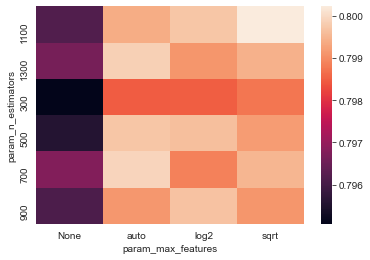

In [83]:
dt = pd.DataFrame(grid1.cv_results_)
dt.param_max_features = dt.param_max_features.astype(str)
dt.param_n_estimators = dt.param_n_estimators.astype(str)

table = pd.pivot_table(dt, values='mean_test_score', index='param_n_estimators', 
                       columns='param_max_features')
     
sns.heatmap(table)

In [84]:
grid1.best_score_

0.8002267693847297

####  2:  Max depth & split 

In [85]:
param_grid2 = {'max_features':['sqrt'], #BYŁO 'auto'
          'n_estimators':[1000, 1100, 1200],
           'criterion': ['entropy', 'gini'],    
          'max_depth': [7, 9, 11, 13, 15, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2.fit(train_x, train_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15, None],
                         'max_features': ['sqrt'],
                         'n_estimators': [1000, 1100, 1200]},
             scoring='f1', verbose=1)

In [86]:
grid2.best_estimator_



RandomForestClassifier(max_depth=11, max_features='sqrt', n_estimators=1000)

<AxesSubplot:xlabel='param_criterion', ylabel='param_max_depth'>

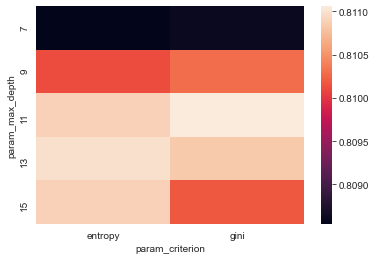

In [87]:
dt = pd.DataFrame(grid2.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_criterion')
     
sns.heatmap(table)




<AxesSubplot:xlabel='param_n_estimators', ylabel='param_max_depth'>

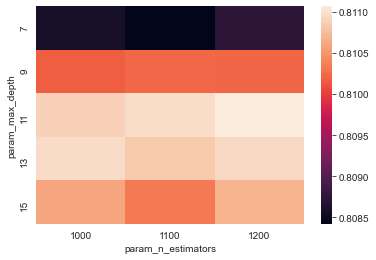

In [88]:
table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_n_estimators')
     
sns.heatmap(table)

In [89]:
grid2.best_score_

0.8111608746524498

In [90]:
param_grid2_2 = {'max_features':['sqrt'],
          'n_estimators':[950, 1000, 1110],
           'criterion': ['gini'],    
          'max_depth': [10, 11, 12],
         }

rf_model = RandomForestClassifier()
grid2_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2_2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2_2.fit(train_x, train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 11, 12],
                         'max_features': ['sqrt'],
                         'n_estimators': [950, 1000, 1110]},
             scoring='f1', verbose=1)

In [91]:
grid2_2.best_estimator_




RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=1110)

In [92]:
grid2_2.best_score_

0.8112690195961489

####  3:  minimum samples leaf & split

In [93]:
param_grid3 = {'max_features':['sqrt'],
          'n_estimators':[1000],
           'criterion': ['gini'],    
          'max_depth': [11],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid3.fit(train_x, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [11],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [94]:
grid3.best_estimator_

RandomForestClassifier(max_depth=11, max_features='sqrt', n_estimators=1000)

<AxesSubplot:xlabel='param_min_samples_split', ylabel='param_min_samples_leaf'>

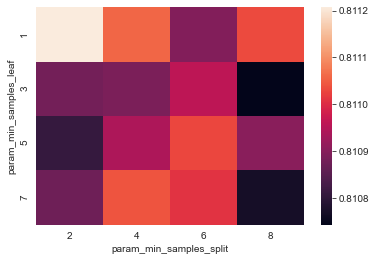

In [95]:
dt = pd.DataFrame(grid3.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_min_samples_leaf', 
                       columns='param_min_samples_split')
     
sns.heatmap(table)

In [96]:
grid3.best_score_

0.8112069451304692

In [98]:
# max_features = 'sqrt' ,max_depth=11, max_features='sqrt', n_estimators=1000,criterion = 'gini',min_samples_leaf=3, min_samples_split=8,


####  4: Class weight

In [ ]:
param_grid4 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
            'max_features':['sqrt'],
          'n_estimators':[1000],
           'criterion': ['gini'],    
          'max_depth': [11],
          'min_samples_leaf': [3],
          'min_samples_split': [8]
         }


rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid4.fit(train_x, train_y)

In [ ]:
grid4.best_estimator_

In [ ]:
dt = pd.DataFrame(grid4.cv_results_)
dt.param_class_weight = dt.param_class_weight.astype(str)
table = pd.pivot_table(dt, values='mean_test_score', index='param_class_weight')
     
sns.heatmap(table)

In [ ]:
grid4.best_score_

In [ ]:
# param_grid5 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
#                'max_features':['auto', 'sqrt', 'log2', None],
#                'n_estimators':[300, 500, 700, 900, 1100, 1300],
#                'criterion': ['entropy', 'gini'],    
#                'max_depth': [7, 9, 11, 13, 15, None],
#                'min_samples_leaf': [1, 3, 5, 7],
#                'min_samples_split': [2, 4, 6, 8]
#          }

# rf_model = RandomForestClassifier()
# grid5 = GridSearchCV(estimator=rf_model, param_grid=param_grid5, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
# grid5.fit(train_x, train_y)

In [57]:
# grid5.best_estimator_



### Final 

In [ ]:

model = RandomForestClassifier(
bootstrap=True, ccp_alpha=0.0,
max_features = 'sqrt' ,max_depth=11, max_features='sqrt', n_estimators=1000,criterion = 'gini',min_samples_leaf=3, min_samples_split=8,
max_leaf_nodes=None, max_samples=None,
min_impurity_decrease=0.0, min_impurity_split=None,min_weight_fraction_leaf=0.0,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False,class_weight={0: 1, 1: 2},)

In [63]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)


# model = RandomForestClassifier()

In [ ]:

#  Classification report : 
#                precision    recall  f1-score   support

#          0.0       0.83      0.43      0.57      4501
#          1.0       0.72      0.94      0.81      6887

#     accuracy                           0.74     11388
#    macro avg       0.78      0.69      0.69     11388
# weighted avg       0.76      0.74      0.72     11388

# Accuracy   Score :  0.7400772743238496
# Area under curve :  0.8080281241730417 
    
    


# Classification report : 
#                precision    recall  f1-score   support

#          0.0       0.68      0.55      0.61     15920
#          1.0       0.75      0.84      0.79     25697

#     accuracy                           0.73     41617
#    macro avg       0.71      0.69      0.70     41617
# weighted avg       0.72      0.73      0.72     41617

# Accuracy   Score :  0.7272749116947401
# Area under curve :  0.7500162260107792 

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.83      0.43      0.57      4501
         1.0       0.72      0.94      0.81      6887

    accuracy                           0.74     11388
   macro avg       0.78      0.69      0.69     11388
weighted avg       0.76      0.74      0.72     11388

Accuracy   Score :  0.7400772743238496
Area under curve :  0.8080281241730417 



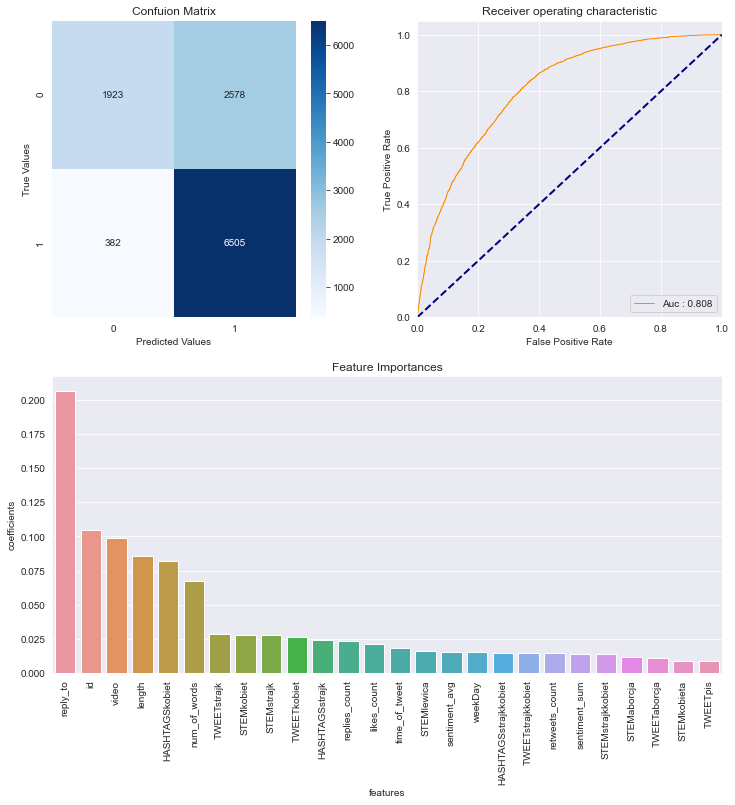

In [69]:
churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

Checking the model's performance on train data itself

In [65]:
train_scores = cross_val_score(model, train_x, train_y, cv = 5, scoring='f1')
train_scores

array([0.8143797 , 0.81445221, 0.80911859, 0.81468204, 0.81185185])

In [66]:
np.mean(train_scores)

0.8128968797864866

In [71]:
df2 = pd.read_csv("C:\\Users\\hp\\Desktop\\wave2_agg.csv")

In [72]:
df2.head()

,Unnamed: 0,username,user_id,id,urls,photos,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,wulga,wulga_proc,data_min,data_max,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSwypierdalać,HASHTAGSkobieta,HASHTAGSaborcja,HASHTAGSstrajk,HASHTAGSpiekłokobiet,HASHTAGStojestwojna,HASHTAGSchcieć,HASHTAGSpis,HASHTAGSlewica,HASHTAGSmieć,HASHTAGSprawy,HASHTAGSprotest,HASHTAGSdziecko,HASHTAGSludzie,HASHTAGSwyroknakobiety,HASHTAGSstrajkobiet,HASHTAGSżyć,HASHTAGSmartalempart,HASHTAGSwiedzieć,HASHTAGSfalasprzeciwu,HASHTAGSzakazaborcji,HASHTAGSprotestkobiet,HASHTAGSjebacpis,HASHTAGSjebaćpis,HASHTAGSosiemgwiazd,HASHTAGSosiemgwiazdek,HASHTAGSwypierdalac,HASHTAGSczarnyprotest,HASHTAGSpieklokobiet,HASHTAGSprawakobiet,HASHTAGSaborcjabezgranic,HASHTAGSkobiet,HASHTAGSpiekłokobietpis,HASHTAGSstrajku,HASHTAGSkobiety,HASHTAGSaborcji,HASHTAGSpisorgpl,HASHTAGSdzieci,HASHTAGSpoland,HASHTAGStvpinfo,HASHTAGSprawa,HASHTAGSwiosnabiedronia,HASHTAGSludzi,HASHTAGSprawo,HASHTAGSpolsce,HASHTAGSaborcją,HASHTAGSjoankasw,TWEETstrajkkobiet,TWEETwypierdalać,TWEETkobieta,TWEETaborcja,TWEETstrajk,TWEETpiekłokobiet,TWEETtojestwojna,TWEETchcieć,TWEETpis,TWEETlewica,TWEETmieć,TWEETprawy,TWEETprotest,TWEETdziecko,TWEETludzie,TWEETwyroknakobiety,TWEETstrajkobiet,TWEETżyć,TWEETmartalempart,TWEETwiedzieć,TWEETfalasprzeciwu,TWEETzakazaborcji,TWEETprotestkobiet,TWEETjebacpis,TWEETjebaćpis,TWEETosiemgwiazd,TWEETosiemgwiazdek,TWEETwypierdalac,TWEETczarnyprotest,TWEETpieklokobiet,TWEETprawakobiet,TWEETaborcjabezgranic,TWEETkobiet,TWEETpiekłokobietpis,TWEETstrajku,TWEETkobiety,TWEETaborcji,TWEETpisorgpl,TWEETdzieci,TWEETpoland,TWEETtvpinfo,TWEETprawa,TWEETwiosnabiedronia,TWEETludzi,TWEETprawo,TWEETpolsce,TWEETaborcją,TWEETjoankasw,STEMstrajkkobiet,STEMwypierdalać,STEMkobieta,STEMaborcja,STEMstrajk,STEMpiekłokobiet,STEMtojestwojna,STEMchcieć,STEMpis,STEMlewica,STEMmieć,STEMprawy,STEMprotest,STEMdziecko,STEMludzie,STEMwyroknakobiety,STEMstrajkobiet,STEMżyć,STEMmartalempart,STEMwiedzieć,STEMfalasprzeciwu,STEMzakazaborcji,STEMprotestkobiet,STEMjebacpis,STEMjebaćpis,STEMosiemgwiazd,STEMosiemgwiazdek,STEMwypierdalac,STEMczarnyprotest,STEMpieklokobiet,STEMprawakobiet,STEMaborcjabezgranic,STEMkobiet,STEMpiekłokobietpis,STEMstrajku,STEMkobiety,STEMaborcji,STEMpisorgpl,STEMdzieci,STEMpoland,STEMtvpinfo,STEMprawa,STEMwiosnabiedronia,STEMludzi,STEMprawo,STEMpolsce,STEMaborcją,STEMjoankasw,time,gone
0,0,0000namjoon,1.760301e+08,1,0,0,1,0,0.0,0.0,3.0,10.0,127,18,4.0,0,0.0,2020-11-05,2020-11-05,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days,True
1,1,000_joker_000,1.854868e+09,5,0,0,5,5,2.0,1.0,13.0,17.0,409,44,3.0,0,0.0,2020-11-03,2020-11-24,-0.26,-1.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21 days,False
2,2,007_nadeine,1.262387e+18,1,0,0,1,1,0.0,0.0,0.0,15.0,133,18,2.0,0,0.0,2020-11-24,2020-11-24,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days,False
3,3,007blondi007,8.847007e+08,36,1,17,36,12,6.0,6.0,54.0,16.0,3529,383,3.0,2,0.0,2020-11-01,2020-12-23,0.00,0.0,6,30,0,0,15,0,3,0,2,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6,30,0,1,16,0,3,0,3,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,1,0,0,2,0,0,0,0,15,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,6,30,1,1,16,0,3,1,3,0,0,0,0,0,1,0,8,0,

In [73]:

df2.loc[df2.gone == True, 'Churn'] = 1
df2.loc[df2.gone == False, 'Churn'] = 0
df2.drop(["user_id","username","gone",'Unnamed: 0','data_min','data_max','time'], inplace = True, axis = 1)
import numpy as np
# # df2.time = (df2.time / np.timedelta64(1,'D')).astype(int)
# df2.aborcja = df2.aborcja
# df2.piekłokobiet = df2.piekłokobiet.astype(int)
# df2.wypierdalać = df2.wypierdalać.astype(int)
# # df2.wyroknakobiety = df2.wyroknakobiety.astype(int)
# df2.falasprzeciwu = df2.falasprzeciwu.astype(int)
# df2.strajkobiet = df2.strajkobiet.astype(int)
# df2.zakazaborcji = df2.zakazaborcji.astype(int)
# df2.protestkobiet = df2.protestkobiet.astype(int)
# df2.jebacpis = df2.jebacpis.astype(int)
# df2.jebaćpis = df2.jebaćpis.astype(int)
# df2.osiemgwiazd = df2.osiemgwiazd.astype(int)
# df2.osiemgwiazdek = df2.osiemgwiazdek.astype(int)
# df2.wypierdalac = df2.wypierdalac.astype(int)
# df2.strajkkobiet = df2.strajkkobiet.astype(int)
# df2.tojestwojna = df2.tojestwojna.astype(int)
# df2.czarnyprotest = df2.czarnyprotest.astype(int)
# df2.pieklokobiet = df2.pieklokobiet.astype(int)
# df2.prawakobiet = df2.prawakobiet.astype(int)
# df2.aborcjabezgranic = df2.aborcjabezgranic.astype(int)
pd.set_option('display.max_columns', None)
df2.head()

,id,urls,photos,video,reply_to,replies_count,retweets_count,likes_count,time_of_tweet,length,num_of_words,weekDay,wulga,wulga_proc,sentiment_avg,sentiment_sum,HASHTAGSstrajkkobiet,HASHTAGSwypierdalać,HASHTAGSkobieta,HASHTAGSaborcja,HASHTAGSstrajk,HASHTAGSpiekłokobiet,HASHTAGStojestwojna,HASHTAGSchcieć,HASHTAGSpis,HASHTAGSlewica,HASHTAGSmieć,HASHTAGSprawy,HASHTAGSprotest,HASHTAGSdziecko,HASHTAGSludzie,HASHTAGSwyroknakobiety,HASHTAGSstrajkobiet,HASHTAGSżyć,HASHTAGSmartalempart,HASHTAGSwiedzieć,HASHTAGSfalasprzeciwu,HASHTAGSzakazaborcji,HASHTAGSprotestkobiet,HASHTAGSjebacpis,HASHTAGSjebaćpis,HASHTAGSosiemgwiazd,HASHTAGSosiemgwiazdek,HASHTAGSwypierdalac,HASHTAGSczarnyprotest,HASHTAGSpieklokobiet,HASHTAGSprawakobiet,HASHTAGSaborcjabezgranic,HASHTAGSkobiet,HASHTAGSpiekłokobietpis,HASHTAGSstrajku,HASHTAGSkobiety,HASHTAGSaborcji,HASHTAGSpisorgpl,HASHTAGSdzieci,HASHTAGSpoland,HASHTAGStvpinfo,HASHTAGSprawa,HASHTAGSwiosnabiedronia,HASHTAGSludzi,HASHTAGSprawo,HASHTAGSpolsce,HASHTAGSaborcją,HASHTAGSjoankasw,TWEETstrajkkobiet,TWEETwypierdalać,TWEETkobieta,TWEETaborcja,TWEETstrajk,TWEETpiekłokobiet,TWEETtojestwojna,TWEETchcieć,TWEETpis,TWEETlewica,TWEETmieć,TWEETprawy,TWEETprotest,TWEETdziecko,TWEETludzie,TWEETwyroknakobiety,TWEETstrajkobiet,TWEETżyć,TWEETmartalempart,TWEETwiedzieć,TWEETfalasprzeciwu,TWEETzakazaborcji,TWEETprotestkobiet,TWEETjebacpis,TWEETjebaćpis,TWEETosiemgwiazd,TWEETosiemgwiazdek,TWEETwypierdalac,TWEETczarnyprotest,TWEETpieklokobiet,TWEETprawakobiet,TWEETaborcjabezgranic,TWEETkobiet,TWEETpiekłokobietpis,TWEETstrajku,TWEETkobiety,TWEETaborcji,TWEETpisorgpl,TWEETdzieci,TWEETpoland,TWEETtvpinfo,TWEETprawa,TWEETwiosnabiedronia,TWEETludzi,TWEETprawo,TWEETpolsce,TWEETaborcją,TWEETjoankasw,STEMstrajkkobiet,STEMwypierdalać,STEMkobieta,STEMaborcja,STEMstrajk,STEMpiekłokobiet,STEMtojestwojna,STEMchcieć,STEMpis,STEMlewica,STEMmieć,STEMprawy,STEMprotest,STEMdziecko,STEMludzie,STEMwyroknakobiety,STEMstrajkobiet,STEMżyć,STEMmartalempart,STEMwiedzieć,STEMfalasprzeciwu,STEMzakazaborcji,STEMprotestkobiet,STEMjebacpis,STEMjebaćpis,STEMosiemgwiazd,STEMosiemgwiazdek,STEMwypierdalac,STEMczarnyprotest,STEMpieklokobiet,STEMprawakobiet,STEMaborcjabezgranic,STEMkobiet,STEMpiekłokobietpis,STEMstrajku,STEMkobiety,STEMaborcji,STEMpisorgpl,STEMdzieci,STEMpoland,STEMtvpinfo,STEMprawa,STEMwiosnabiedronia,STEMludzi,STEMprawo,STEMpolsce,STEMaborcją,STEMjoankasw,Churn
0,1,0,0,1,0,0.0,0.0,3.0,10.0,127,18,4.0,0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,5,0,0,5,5,2.0,1.0,13.0,17.0,409,44,3.0,0,0.0,-0.26,-1.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1,0,0,1,1,0.0,0.0,0.0,15.0,133,18,2.0,0,0.0,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,36,1,17,36,12,6.0,6.0,54.0,16.0,3529,383,3.0,2,0.0,0.00,0.0,6,30,0,0,15,0,3,0,2,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6,30,0,1,16,0,3,0,3,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,1,0,0,2,0,0,0,0,15,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,6,30,1,1,16,0,3,1,3,0,0,0,0,0,1,0,8,0,2,0,0,0,0,0,1,0,0,2,0,0,0,0,15,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0.0
4,2,0,2,2,2,0.0,0.0,2.0,22.0,504,70,3.0,0,0.0,-1.00,-2.0,2,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,

In [79]:
x = df2[imp_df.Varname[imp_df.Imp>0.01].values].columns
y = "Churn"

test2_x = df2[x]
test2_y = df2[y]

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.68      0.55      0.61     15920
         1.0       0.75      0.84      0.79     25697

    accuracy                           0.73     41617
   macro avg       0.71      0.69      0.70     41617
weighted avg       0.72      0.73      0.72     41617

Accuracy   Score :  0.7272749116947401
Area under curve :  0.7500162260107792 



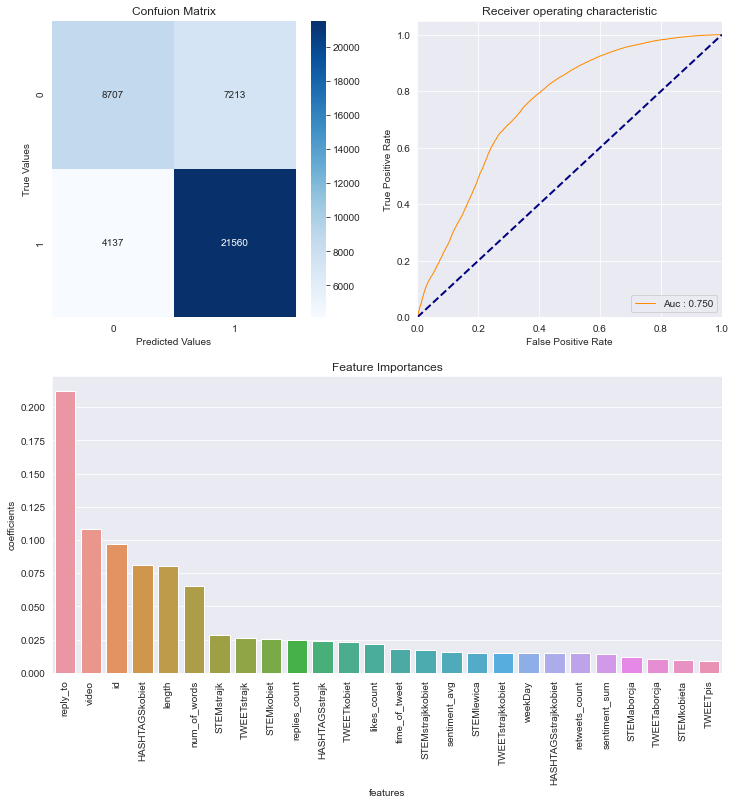

In [80]:
churn_prediction(model, train_x, train_y, test2_x, test2_y, x,"features")

In [ ]:
import pickle
pickle.dump(model, open('Witczak_model_final.pkl','wb'))